# Projeto - Mineração de Texto e Web
## Residência Engenharia e Ciência de dados - Samsung/UFPE

### Lucas Couri - lncc2
### Mariama Oliveira - mcso

In [29]:
import lxml.html as parser
import requests
from selenium import webdriver
#import csv
#from urllib.parse import urlsplit, urljoin

from bs4 import BeautifulSoup
import time

In [ ]:
start_url = "https://www.americanas.com.br/produto/111042393?pfm_carac=Os%20mais%20vendidos&pfm_index=8&pfm_page=hotsite&pfm_pos=maintop1&pfm_type=vit_spacey&cor=VERMELHO"
r = requests.get(start_url)
html = parser.fromstring(r.text)

In [24]:
chrome_path = r'/usr/local/bin/chromedriver' #path from 'which chromedriver'
driver = webdriver.Chrome(executable_path=chrome_path)

/var/folders/1m/y3z71pwn1gj1xgby2r8jtfcm0000gn/T/ipykernel_45393/783884132.py:2: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(executable_path=chrome_path)


In [44]:
options = webdriver.ChromeOptions()
options.add_argument('--ignore-certificate-errors')
options.add_argument('--incognito')
options.add_argument('--headless')
driver = webdriver.Chrome("/usr/local/bin/chromedriver", chrome_options=options)


url = "https://www.americanas.com.br/produto/111042393?pfm_carac=Os%20mais%20vendidos&pfm_index=8&pfm_page=hotsite&pfm_pos=maintop1&pfm_type=vit_spacey&cor=VERMELHO"

driver = webdriver.Chrome()
driver.implicitly_wait(10)
driver.get(url)

# try:
#     iframe = driver.find_element_by_id("nvpush_popup_background_iframe")
#     cross = driver.find_element_by_id("nvpush_cross")
#     cross.click()
# except:
#     pass
index = 9
while True:
    try:
        xpath = f"//*[@id='card-reviews-title']/div[2]/div/div/div[{index}]/button"
        loadmore = driver.find_element_by_xpath(xpath=xpath)
        loadmore.click()
        time.sleep(10)
        index += 6
    except Exception as e:
        print("Deu ruim")
        print(e)
        print("Reached bottom of page")
        break
    

soup = BeautifulSoup(driver.page_source,'html.parser')


/var/folders/1m/y3z71pwn1gj1xgby2r8jtfcm0000gn/T/ipykernel_45393/2171134015.py:5: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome("/usr/local/bin/chromedriver", chrome_options=options)
/var/folders/1m/y3z71pwn1gj1xgby2r8jtfcm0000gn/T/ipykernel_45393/2171134015.py:5: DeprecationWarning: use options instead of chrome_options
  driver = webdriver.Chrome("/usr/local/bin/chromedriver", chrome_options=options)
/var/folders/1m/y3z71pwn1gj1xgby2r8jtfcm0000gn/T/ipykernel_45393/2171134015.py:28: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  loadmore = driver.find_element_by_xpath(xpath=xpath)


Deu ruim
Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id='card-reviews-title']/div[2]/div/div/div[75]/button"}
  (Session info: chrome=99.0.4844.51)
Stacktrace:
0   chromedriver                        0x00000001095c2ee9 chromedriver + 5013225
1   chromedriver                        0x000000010954e1d3 chromedriver + 4534739
2   chromedriver                        0x0000000109124a68 chromedriver + 170600
3   chromedriver                        0x0000000109159152 chromedriver + 385362
4   chromedriver                        0x0000000109159311 chromedriver + 385809
5   chromedriver                        0x000000010918b324 chromedriver + 590628
6   chromedriver                        0x000000010917680d chromedriver + 505869
7   chromedriver                        0x0000000109189074 chromedriver + 581748
8   chromedriver                        0x00000001091766d3 chromedriver + 505555
9   chromedriver                        0x000000010914c76e chromed


<!DOCTYPE html>

<html lang="pt-BR">
<head>
<title data-react-helmet="true">Jogo de Panelas Tramontina Versalhes Alumínio Antiaderente 5 Peças em Promoção | Ofertas na Americanas</title>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="width=device-width, initial-scale=1, maximum-scale=1" name="viewport"/>
<meta ,="" content="yes" name="mobile-web-app-capable"/>
<meta charset="utf-8"/>
<meta content="3.0.339" name="version"/>
<link crossorigin="" href="www.google-analytics.com" rel="dns-prefetch"/>
<link crossorigin="" href="www.googletagmanager.com" rel="dns-prefetch"/>
<link href="https://images-americanas.b2w.io/catalog-statics/acom/favicon-americanas.ico" rel="shortcut icon" sizes="16x16"/>
<meta content="Jogo de Panelas Tramontina Versalhes Alumínio Antiaderente 5 Peças em promoção na Americanas. Encontre as melhores ofertas e os melhores preços, com entrega rápida. Vem!" data-react-helmet="true" name="description"/><meta content="app-id=com.b2w.americanas" d
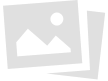

In [7]:
#With beautifulsoup
HEADERS = ({'User-Agent':
            'Mozilla/5.0 (Windows NT 10.0; Win64; x64) \
            AppleWebKit/537.36 (KHTML, like Gecko) \
            Chrome/90.0.4430.212 Safari/537.36',
            'Accept-Language': 'en-US, en;q=0.5'})

def getdata(url):
    r = requests.get(url, headers=HEADERS)
    return r.text

def html_code(url):
  
    # pass the url
    # into getdata function
    htmldata = getdata(url)
    soup = BeautifulSoup(htmldata, 'html.parser')
  
    # display html code
    return (soup)

url = "https://www.americanas.com.br/produto/111042393?pfm_carac=Os%20mais%20vendidos&pfm_index=8&pfm_page=hotsite&pfm_pos=maintop1&pfm_type=vit_spacey&cor=VERMELHO"
  
soup = html_code(url)
print(soup)


In [16]:
def cus_data(soup):
    # find the Html tag
    # with find()
    # and convert into string
    data_str = ""
    cus_list = []
  
    for item in soup.find_all("span", class_="src__Text-sc-154pg0p-0 src__TextUI-sc-1ht81y0-0 ealAWO"):
        data_str = data_str + item.get_text()
        cus_list.append(data_str)
        data_str = ""
        
    for item in soup.find_all("span", class_="src__Text-sc-154pg0p-0 src__TextUI-sc-1ht81y0-0 fAfPCO"):
        data_str = data_str + item.get_text()
        cus_list.append(data_str)
        data_str = ""
    
    return cus_list
  
  
cus_res = cus_data(soup)
print(cus_res)

# src__Text-sc-154pg0p-0 src__TextUI-sc-1ht81y0-0 inlGjV
# src__Text-sc-154pg0p-0 src__TextUI-sc-1ht81y0-0 ealAWO



['NÃO SE ENGANEM PRODUTO DE PÉSSIMA QUALIDADE,FAZEM TRINTA DIAS QUE RECEBI AS PANELAS, A ENTREGA FOI EXCELENTE,EM COMPENSAÇÃO AS PANELAS JÁ DESCASCARAM, A FRIGIDEIRA NÃO PARA NO LUGAR,E A PRÓPRIA ATENDENTE DA TRAMONTINA CONFIRMOU QUE É UM PRODUTO DE SEGUNDA LINHA.COM CERTEZA DINHEIRO JOGADO FORA!!!!!', 'Uso a quase 5 anos e super recomendo. Material bem feito e de qualidade.', 'Adorei minha compra, podemos acompanhar pelo aplicativo, chegou antes da data prevista e é realmente o que diz na descrição....parabéns Americanas', 'Recomendo...excelente produto, cumpre o que promete.', 'Recomendo desde quando saibam que as panelas sao tamanhos pequenos. \nMas queria saber, pq depois que a gente compra, diminui o preço?? Fiquem atentos!! Pesquisem preço!', 'Na descrição informa que a peça é vermelha com a parte interna na cor creme. Mas, por fora, eu não diria que é a cor é vermelha, mas sim um vinho rosado escuro. Acho que o tom deixou a desejar. Apesar do tom discreto nas fotos, pessoalmente

In [17]:
len(cus_res)

6